<a href="https://colab.research.google.com/github/HinePo/Kaggle-Competition-House-Prices-Regression/blob/main/KC_House_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Competition: Advanced Regression Techniques

# Importing and Loading Dataset

In [ ]:
# Essentials
import numpy as np
import pandas as pd
#import datetime
#import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
plt.style.use('bmh')

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
#from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#from sklearn.decomposition import PCA

#pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.float_format', lambda x : '{:.4f}'.format(x))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,CBlock,TA,TA,No,Rec,468.0000,LwQ,144.0000,270.0000,882.0000,GasA,TA,Y,SBrkr,896,0,0,896,0.0000,0.0000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0000,Unf,1.0000,730.0000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0000,TA,TA,CBlock,TA,TA,No,ALQ,923.0000,Unf,0.0000,406.0000,1329.0000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0000,0.0000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0000,Unf,1.0000,312.0000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,PConc,Gd,TA,No,GLQ,791.0000,Unf,0.0000,137.0000,928.0000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0000,0.0000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0000,Fin,2.0000,482.0000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0000,TA,TA,PConc,TA,TA,No,GLQ,602.0000,Unf,0.0000,324.0000,926.0000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0000,0.0000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0000,Fin,2.0000,470.0000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0000,Gd,TA,PConc,Gd,TA,No,ALQ,263.0000,Unf,0.0000,1017.0000,1280.0000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0000,0.0000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0000,RFn,2.0000,506.0000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Delete Id columns from train and test: primary keys are not useful for any model

# store columns in variables first
train_ID = train['Id']
test_ID = test['Id']

# delete from train and test
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

# check
train.shape, test.shape

((1460, 80), (1459, 79))

In [ ]:
# numerical variables
num_vars = train.select_dtypes(exclude = ['object']).columns

# categorical variables
cat_vars = train.select_dtypes(include = ['object']).columns

In [ ]:
print("There are %d numerical variables." % len(num_vars))
print("There are %d categorical variables." % len(cat_vars))

print("\nNumerical variables: %s" % num_vars)
print("\nCategorical variables: %s" % cat_vars)

There are 37 numerical variables.
There are 43 categorical variables.

Numerical variables: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Categorical variables: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'F

# About SalePrice

Let's take a look at the variable we are trying to predict.

## Distribution

[Text(0.5, 1.0, 'SalePrice distribution')]

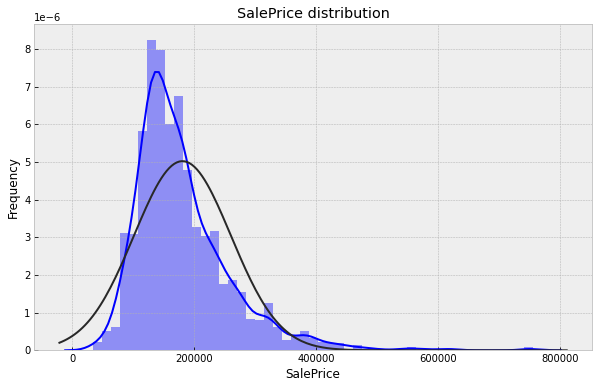

In [ ]:
# distribution plot
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(train['SalePrice'], color="b", fit=norm);
ax.xaxis.grid(True)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

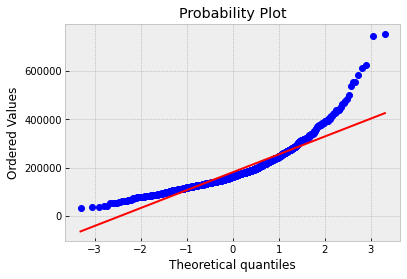

In [ ]:
stats.probplot(train['SalePrice'], plot=plt)

In [ ]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

print("\nSalePrice min: %.2f" % train['SalePrice'].min())
print("SalePrice max: %.2f" % train['SalePrice'].max())

Skewness: 1.882876
Kurtosis: 6.536282

SalePrice min: 34900.00
SalePrice max: 755000.00


Later on we will try to make SalePrice column more normally distributed using a BoxCox1p transformation, which is commonly used in cases where skewness is positive.

Before transforming, we should analyse the dataset and deal with missing values.

## Correlations to numerical variables

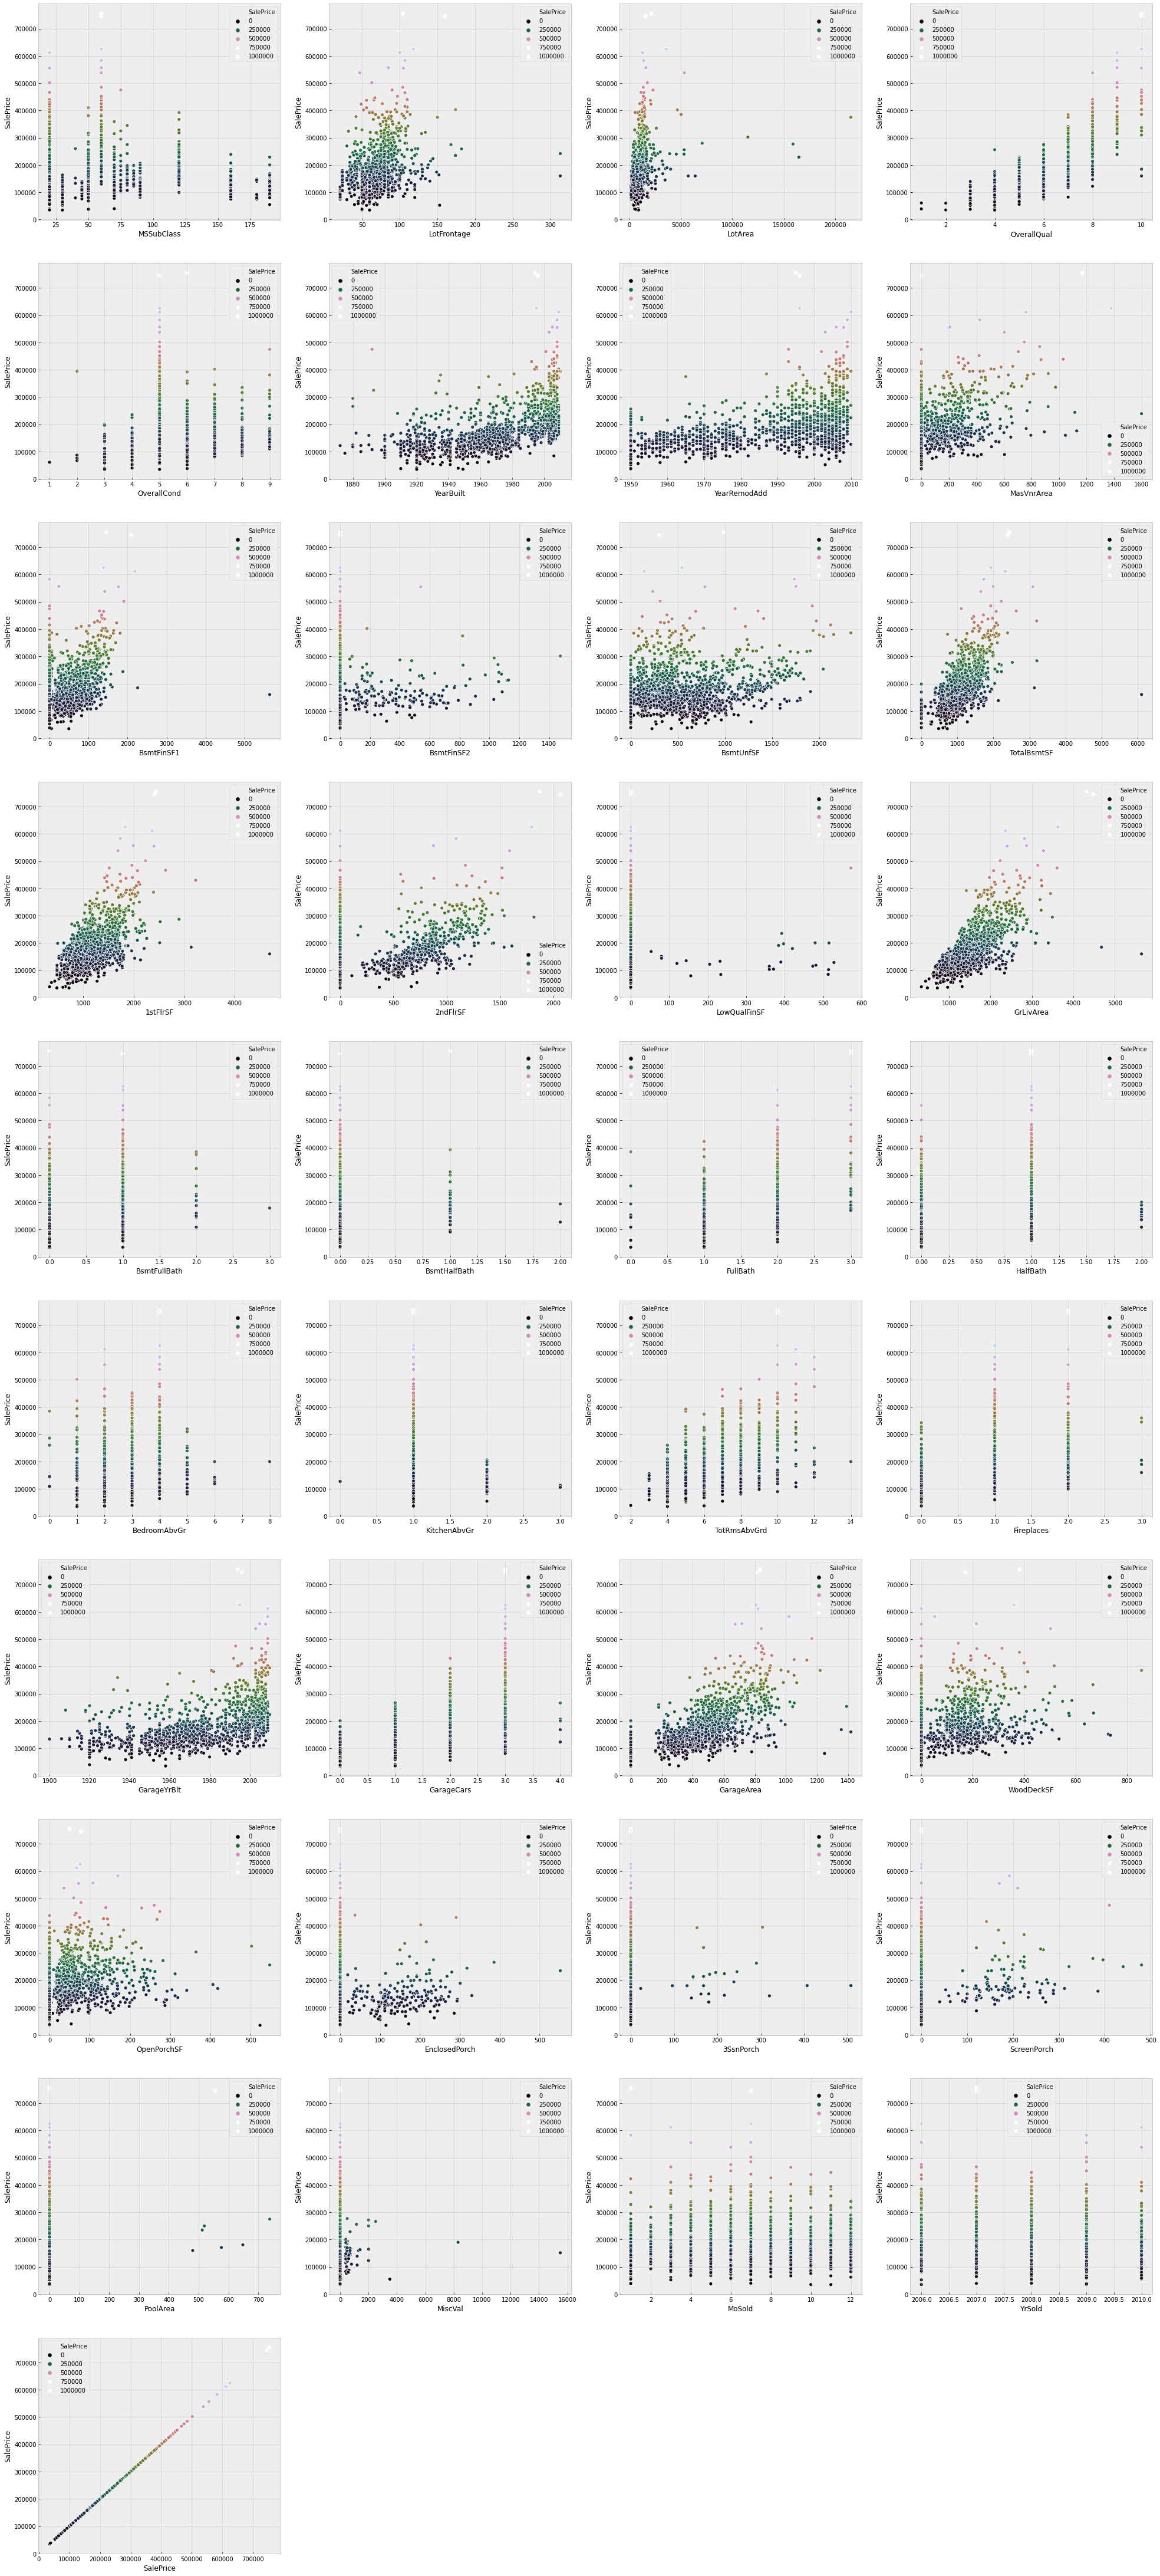

In [ ]:
# SalePrice correlations to numerical variables
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(14, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(list(train[num_vars]), 1):
    plt.subplot(len(list(num_vars)), 4, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='cubehelix', data=train)

## Heatmap correlations

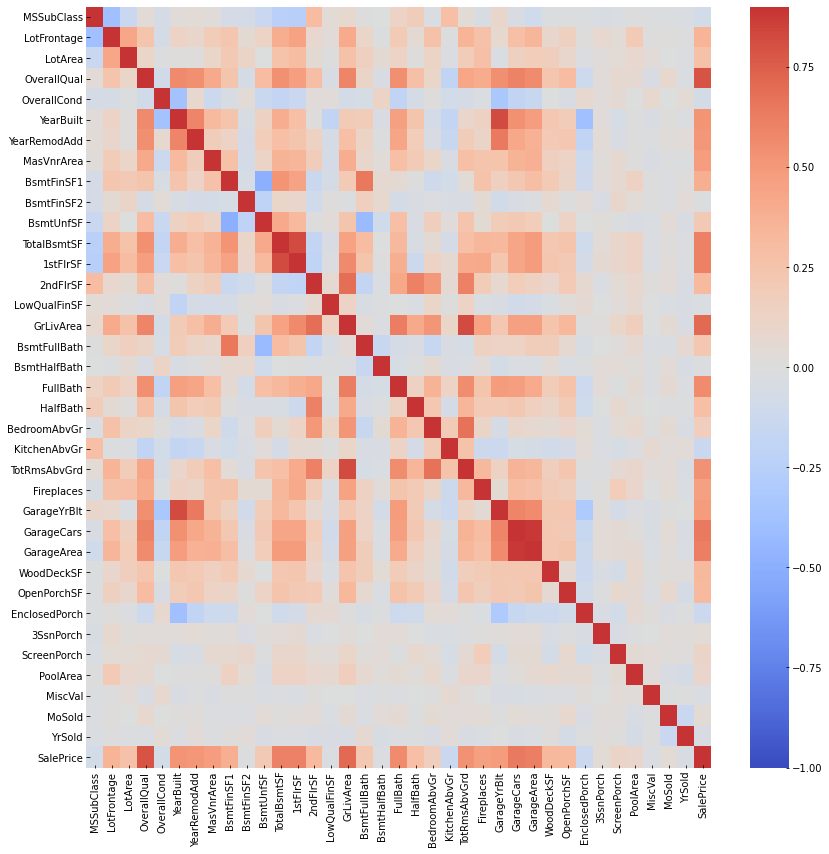

In [ ]:
# numerical variables correlations heatmap
plt.figure(figsize=(14,14))
sns.heatmap(train[num_vars].corr(), vmin=-1, vmax=0.9, center= 0, cmap= 'coolwarm')

In [ ]:
# ordered correlations to SalePrice column
train.corr().sort_values(by='SalePrice', ascending=False)['SalePrice']

SalePrice        1.0000
OverallQual      0.7910
GrLivArea        0.7086
GarageCars       0.6404
GarageArea       0.6234
TotalBsmtSF      0.6136
1stFlrSF         0.6059
FullBath         0.5607
TotRmsAbvGrd     0.5337
YearBuilt        0.5229
YearRemodAdd     0.5071
GarageYrBlt      0.4864
MasVnrArea       0.4775
Fireplaces       0.4669
BsmtFinSF1       0.3864
LotFrontage      0.3518
WoodDeckSF       0.3244
2ndFlrSF         0.3193
OpenPorchSF      0.3159
HalfBath         0.2841
LotArea          0.2638
BsmtFullBath     0.2271
BsmtUnfSF        0.2145
BedroomAbvGr     0.1682
ScreenPorch      0.1114
PoolArea         0.0924
MoSold           0.0464
3SsnPorch        0.0446
BsmtFinSF2      -0.0114
BsmtHalfBath    -0.0168
MiscVal         -0.0212
LowQualFinSF    -0.0256
YrSold          -0.0289
OverallCond     -0.0779
MSSubClass      -0.0843
EnclosedPorch   -0.1286
KitchenAbvGr    -0.1359
Name: SalePrice, dtype: float64

## Checking some highly correlated variables

Now we will analyse the SalePrice relations to some of the highly related variables shown on the heatmap: OverallQual, YearBuilt, TotalBsmtSF, LotArea, GrLivArea. This is a good time to remove some outliers too, if there is any.

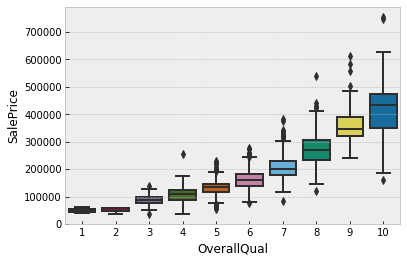

In [ ]:
sns.boxplot(x=train['OverallQual'], y="SalePrice", data=train)

In [ ]:
# There are 3 observations/outliers that met the conditions below, so we will delete these
train[(train['OverallQual']<5) & (train['SalePrice']>150000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
457,20,RL,nan,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,BLQ,1116,Unf,0,248,1364,GasA,Ex,Y,SBrkr,1663,0,0,1663,1,0,1,0,2,1,Gd,6,Min1,2,Gd,Attchd,1954.0000,Fin,2,529,TA,TA,Y,224,137,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000
1020,20,RL,60.0000,7024,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,PConc,Gd,TA,No,GLQ,1024,Unf,0,108,1132,GasA,Ex,Y,SBrkr,1132,0,0,1132,1,0,1,1,2,1,Gd,5,Typ,0,NaN,Attchd,2005.0000,Fin,2,451,TA,TA,Y,252,64,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,176000
1190,190,RL,nan,32463,Pave,NaN,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0000,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0000,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1262,50,RL,nan,11250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,4,5,1957,1989,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0000,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1104,1104,GasA,Ex,Y,FuseA,1104,684,0,1788,1,0,1,0,5,1,TA,8,Min2,2,TA,Attchd,1957.0000,Unf,1,304,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,161500


In [ ]:
print(train.shape)
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
print(train.shape)

(1460, 80)
(1459, 80)


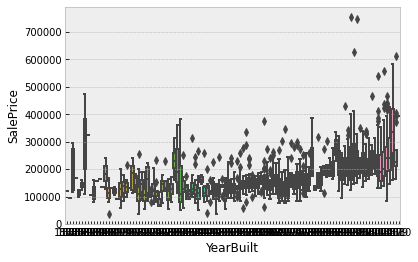

In [ ]:
sns.boxplot(x=train['YearBuilt'], y="SalePrice", data=train)

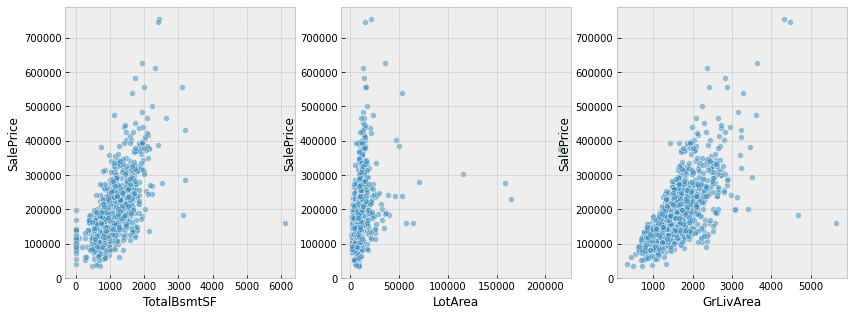

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(14,5))
sns.scatterplot(x=train['TotalBsmtSF'], y="SalePrice", data=train, alpha=0.5, ax=ax[0])
sns.scatterplot(x=train['LotArea'], y="SalePrice", data=train, alpha=0.5, ax=ax[1])
sns.scatterplot(x=train['GrLivArea'], y="SalePrice", data=train, alpha=0.5, ax=ax[2])

In [ ]:
# We will also delete the following 2 observations/outliers
train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0000,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0000,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0000,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0000,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0000,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0000,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
print(train.shape)
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)
print(train.shape)

(1459, 80)
(1457, 80)


In [ ]:
train.reset_index(drop=True, inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Features and Target

In [ ]:
# features
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# target
train_target = train['SalePrice'].reset_index(drop=True)

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2916, 79)

# Feature Engineering

In this part I will follow the amazing feature engineering ideas and work done by Serigne. Go check it out!

https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard#Data-Processing

### Missing Values

In [ ]:
# How many are there in each column?

total = all_features.isnull().sum().sort_values(ascending=False)
percent = (all_features.isnull().sum()/all_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("There is a total of %d features that have missing values" % len(missing_data[missing_data['Total']>=1]))
missing_data[missing_data['Total']>=1]

There is a total of 34 features that have missing values


,Total,Percent
PoolQC,2907,0.9969
MiscFeature,2811,0.9640
Alley,2718,0.9321
Fence,2345,0.8042
FireplaceQu,1420,0.4870
LotFrontage,485,0.1663
GarageCond,159,0.0545
GarageQual,159,0.0545
GarageYrBlt,159,0.0545
GarageFinish,159,0.0545


In [ ]:
all_features["PoolQC"] = all_features["PoolQC"].fillna("None")
all_features["MiscFeature"] = all_features["MiscFeature"].fillna("None")
all_features["Alley"] = all_features["Alley"].fillna("None")
all_features["Fence"] = all_features["Fence"].fillna("None")
all_features["FireplaceQu"] = all_features["FireplaceQu"].fillna("None")
all_features["LotFrontage"] = all_features.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_features[col] = all_features[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_features[col] = all_features[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_features[col] = all_features[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_features[col] = all_features[col].fillna('None')
all_features["MasVnrType"] = all_features["MasVnrType"].fillna("None")
all_features["MasVnrArea"] = all_features["MasVnrArea"].fillna(0)
all_features['MSZoning'] = all_features['MSZoning'].fillna(all_features['MSZoning'].mode()[0])
all_features = all_features.drop(['Utilities'], axis=1)
all_features["Functional"] = all_features["Functional"].fillna("Typ")
all_features['Electrical'] = all_features['Electrical'].fillna(all_features['Electrical'].mode()[0])
all_features['KitchenQual'] = all_features['KitchenQual'].fillna(all_features['KitchenQual'].mode()[0])
all_features['Exterior1st'] = all_features['Exterior1st'].fillna(all_features['Exterior1st'].mode()[0])
all_features['Exterior2nd'] = all_features['Exterior2nd'].fillna(all_features['Exterior2nd'].mode()[0])
all_features['SaleType'] = all_features['SaleType'].fillna(all_features['SaleType'].mode()[0])
all_features['MSSubClass'] = all_features['MSSubClass'].fillna("None")

In [ ]:
# How many are there in each column? (re-run)

total = all_features.isnull().sum().sort_values(ascending=False)
percent = (all_features.isnull().sum()/all_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("There is a total of %d features that have missing values" % len(missing_data[missing_data['Total']>=1]))
missing_data[missing_data['Total']>=1]

There is a total of 0 features that have missing values


,Total,Percent


### Transforming Data Types

In [ ]:
# Transforming numerical variables that actually are categorical
all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)
all_features['OverallCond'] = all_features['OverallCond'].astype(str)
all_features['YrSold'] = all_features['YrSold'].astype(str)
all_features['MoSold'] = all_features['MoSold'].astype(str)

### Label Encoder

In [ ]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_features[c].values)) 
    all_features[c] = lbl.transform(list(all_features[c].values))

# shape        
print('Shape all_features: {}'.format(all_features.shape))

Shape all_features: (2916, 78)


### Creating New Features

In [ ]:
print('Shape all_features: {}'.format(all_features.shape))

Shape all_features: (2916, 78)


In [ ]:
(all_features['WoodDeckSF'] == 0)

0        True
1       False
2        True
3        True
4       False
        ...  
2911     True
2912     True
2913    False
2914    False
2915    False
Name: WoodDeckSF, Length: 2916, dtype: bool

In [ ]:
all_features['BsmtFinType1_Unf'] = 1*(all_features['BsmtFinType1'] == 'Unf')
all_features['HasWoodDeck'] = (all_features['WoodDeckSF'] == 0) * 1
all_features['HasOpenPorch'] = (all_features['OpenPorchSF'] == 0) * 1
all_features['HasEnclosedPorch'] = (all_features['EnclosedPorch'] == 0) * 1
all_features['Has3SsnPorch'] = (all_features['3SsnPorch'] == 0) * 1
all_features['HasScreenPorch'] = (all_features['ScreenPorch'] == 0) * 1
all_features['YearsSinceRemodel'] = all_features['YrSold'].astype(int) - all_features['YearRemodAdd'].astype(int)
all_features['Total_Home_Quality'] = all_features['OverallQual'] + all_features['OverallCond']
#all_features = all_features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
all_features['TotalSF'] = all_features['TotalBsmtSF'] + all_features['1stFlrSF'] + all_features['2ndFlrSF']
all_features['YrBltAndRemod'] = all_features['YearBuilt'] + all_features['YearRemodAdd']
all_features['Total_sqr_footage'] = (all_features['BsmtFinSF1'] + all_features['BsmtFinSF2'] +
                                 all_features['1stFlrSF'] + all_features['2ndFlrSF'])
all_features['Total_Bathrooms'] = (all_features['FullBath'] + (0.5 * all_features['HalfBath']) +
                               all_features['BsmtFullBath'] + (0.5 * all_features['BsmtHalfBath']))
all_features['Total_porch_sf'] = (all_features['OpenPorchSF'] + all_features['3SsnPorch'] +
                              all_features['EnclosedPorch'] + all_features['ScreenPorch'] +
                              all_features['WoodDeckSF'])
all_features['TotalBsmtSF'] = all_features['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_features['2ndFlrSF'] = all_features['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
all_features['GarageArea'] = all_features['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
all_features['GarageCars'] = all_features['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
all_features['LotFrontage'] = all_features['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
all_features['MasVnrArea'] = all_features['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
all_features['BsmtFinSF1'] = all_features['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

all_features['haspool'] = all_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['has2ndfloor'] = all_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasgarage'] = all_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasbsmt'] = all_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasfireplace'] = all_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
print('Shape all_features: {}'.format(all_features.shape))

Shape all_features: (2916, 96)


This part is based on Lavanya's kernel: https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition#Feature-Engineering

Thanks for sharing it!

We will create more features based on the logs and squares for some other variables/columns. This helps the model learning process.

In [ ]:
# function to create/calculate logs from columns listed below
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

# columns to manipulate (calculate log)
log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']

# calling logs function
all_features = logs(all_features, log_features)

In [ ]:
# function to create/calculate logs from columns listed below
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

# columns to manipulate (calculate squares)
squared_features = ['YearRemodAdd', 'LotFrontage_log', 
              'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'GrLivArea_log',
              'GarageCars_log', 'GarageArea_log']

# calling squares function
all_features = squares(all_features, squared_features)

In [ ]:
all_features.shape

(2916, 134)

### Skewed Features

In [ ]:
numeric_feats = all_features.dtypes[all_features.dtypes != "object"].index
print("There are {} numerical features :".format(numeric_feats.shape[0]))

# Check the skew of all numerical features
skewed_features = all_features[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' : skewed_features})
skewness.head(10)

There are 114 numerical features :

Skew in numerical features: 



,Skew
MiscVal,21.9359
PoolArea,17.6856
PoolArea_log,15.6210
haspool,15.4921
LotArea,13.2625
LowQualFinSF,12.0824
3SsnPorch,11.3701
3SsnPorch_log,8.8209
LowQualFinSF_log,8.5537
MiscVal_log,5.2115


In [ ]:
high_skew = skewed_features[skewed_features > 0.75]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.75 :".format(high_skew.shape[0]))
high_skewness = pd.DataFrame({'High Skewed' : high_skew})
high_skewness.head(10)

There are 36 numerical features with Skew > 0.75 :


,High Skewed
MiscVal,21.9359
PoolArea,17.6856
PoolArea_log,15.6210
haspool,15.4921
LotArea,13.2625
LowQualFinSF,12.0824
3SsnPorch,11.3701
3SsnPorch_log,8.8209
LowQualFinSF_log,8.5537
MiscVal_log,5.2115


Now we use the scipy function boxcox1p which calculates the Box-Cox transformation to make the data distribution more normal.

Box-Cox Transformation:
http://onlinestatbook.com/2/transformations/box-cox.html

SciPy boxcox1p documentation:
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html

In [ ]:
# Normalize skewed features
for i in skew_index:
    all_features[i] = boxcox1p(all_features[i], boxcox_normmax(all_features[i] + 1))

### Transforming Target

In [ ]:
# log(1+x) transform
train["SalePrice"] = np.log1p(train["SalePrice"])

In [ ]:
# redefining target transformed with log
train_target = train['SalePrice'].reset_index(drop=True)

[Text(0.5, 1.0, 'SalePrice distribution')]

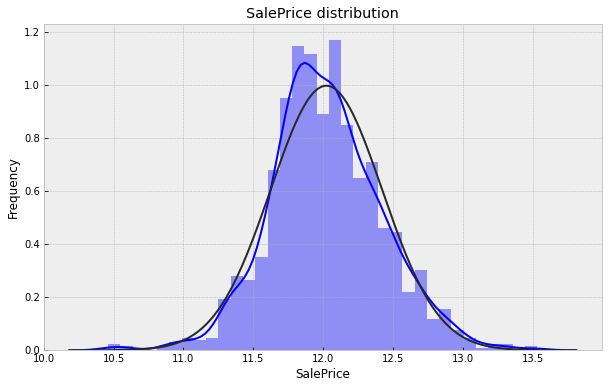

In [ ]:
# distribution plot (re-run)
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(train['SalePrice'], color="b", fit=norm);
ax.xaxis.grid(True)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

This distribution seem much better and our model should appreciate it.

In [ ]:
# check new SalePrice column 
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

print("\nSalePrice min: %.2f" % train['SalePrice'].min())
print("SalePrice max: %.2f" % train['SalePrice'].max())

Skewness: 0.123045
Kurtosis: 0.807618

SalePrice min: 10.46
SalePrice max: 13.53


((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.39849613072873646, 12.023720768946777, 0.9953596516661674))

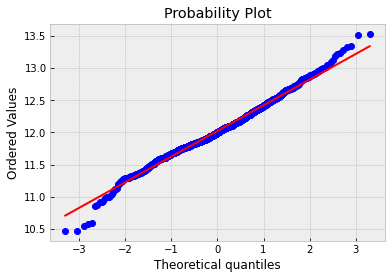

In [ ]:
stats.probplot(train['SalePrice'], plot=plt)

### One Hot Encoding

In [ ]:
print(all_features.shape)
all_features = pd.get_dummies(all_features).reset_index(drop=True)
print(all_features.shape)

(2916, 134)
(2916, 275)


In [ ]:
# Remove duplicated columns, if there is any
all_features = all_features.loc[:,~all_features.columns.duplicated()]
print(all_features.shape)

(2916, 275)


# Split Dataset

Previously we concatenated both train and test features to make the changes and transformations apply to all of them. Now we will undo this, since we are going to train the models next.

In [ ]:
all_features.isnull().values.any()

False

In [ ]:
# row 0 to row len(train_target), all columns
X = all_features.iloc[:len(train_target), :]

# row len(train_target) to last row, all columns
X_test = all_features.iloc[len(train_target):, :]

X.shape, train_target.shape, X_test.shape

((1457, 275), (1457,), (1459, 275))

In [ ]:
# numerical variables
num_vars_X = X.select_dtypes(exclude = ['object']).columns

# categorical variables
cat_vars_X = X.select_dtypes(include = ['object']).columns

In [ ]:
print("There are %d numerical variables." % len(num_vars_X))
print("There are %d categorical variables." % len(cat_vars_X))

There are 275 numerical variables.
There are 0 categorical variables.


Data is ready for the model: no missing values and only numerical data.

# Modeling

## Evaluation Metric

In [ ]:
# Cross Validation
kf = KFold(n_splits=12, random_state=0, shuffle=True)

# Root Mean Squared Error (for Cross Validation Evaluation)
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_target, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

# Root Mean Squared Log Error (to evaluate predictions on test set)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

## Models

In [ ]:
scores = {}

### Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=0)

score = cv_rmse(rf)
print("Random Forest: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['RF'] = (score.mean(), score.std())

Random Forest: 0.1325 (0.0178)


### XGB

In [ ]:
xgboost = XGBRegressor(objective='reg:squarederror', random_state=0)

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['XGB'] = (score.mean(), score.std())

xgboost: 0.1206 (0.0146)


### LightGBM

In [ ]:
lightgbm = LGBMRegressor(objective='regression', random_state=0)

score = cv_rmse(lightgbm)
print("Light gbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['LGBM'] = (score.mean(), score.std())

Light gbm: 0.1241 (0.0165)


### Ridge

In [ ]:
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4,
                5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2,
                0.1, 0.3, 1, 3, 5, 10, 15, 18, 20,
                30, 50, 75, 100]
                
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Ridge'] = (score.mean(), score.std())

Ridge: 0.1098 (0.0133)


### Lasso

In [ ]:
lasso_alphas = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=lasso_alphas, random_state=0, cv=kf))

score = cv_rmse(lasso)
print("Lasso: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Lasso'] = (score.mean(), score.std())

Lasso: 0.1085 (0.0134)


### SVR

In [ ]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['SVR'] = (score.mean(), score.std())

SVR: 0.1161 (0.0129)


### GBR

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=0)

score = cv_rmse(gbr)
print("GBR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['GBR'] = (score.mean(), score.std())                               

GBR: 0.1109 (0.0161)


### Keras

In [ ]:
from __future__ import absolute_import, division, print_function
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
print(tf.__version__)

2.2.0


#### Normalization

In [ ]:
X_stats = X.describe().transpose()
X_stats.head()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1457.0000,7.1524,3.6559,0.0000,5.0000,6.0000,10.0000,15.0000
LotFrontage,1457.0000,18.7664,3.6216,8.7226,17.2392,18.9998,20.6600,47.7277
LotArea,1457.0000,14.2313,1.1755,10.1270,13.7955,14.3165,14.7882,22.6549
Street,1457.0000,0.9959,0.0641,0.0000,1.0000,1.0000,1.0000,1.0000
Alley,1457.0000,0.9938,0.2499,0.0000,1.0000,1.0000,1.0000,2.0000


In [ ]:
# Normalize into range 0-1 using a Z-score
def normalize(x):
  return (x - X_stats['mean']) / X_stats['std']

X_norm = norm(X)
X_norm_test = norm(X_test)

In [ ]:
X_norm

#### Keras Model

In [ ]:
input_shape = len(X.keys())
input_shape

275

In [ ]:
# Model: define layers
def build_model():
  np.random.seed(0)
  model = Sequential()

  # input layer
  model.add(Dense(180, input_dim = input_shape, activation = 'relu')) # 180

  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  # 2nd layer: hidden Dense layer
  model.add(Dense(120, activation = 'relu')) # 120

  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  #3rd layer: hidden Dense layer
  model.add(Dense(60, activation = 'relu'))

  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  # output layer
  model.add(Dense(1))
  # last layer doesn't have an activation
  # meaning that it's a Linear Activation
  # and for a Regression model,
  # that's what we want

  # Define optimizer and learning rate
  optimizer = Adam(lr = 0.002, decay = 0.)
  # optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss = 'mse',
              optimizer = optimizer,
              # metrics = ['mae', 'mse'],
              metrics = [tf.keras.metrics.RootMeanSquaredError(), 'mae']) # evaluate method
  
  return model

In [ ]:
# Create Model
model = build_model()
model.summary()

NameError: ignored

In [ ]:
# we can test our model even though we haven't trained it
# just to make sure that it produces results and doesn't blow up.

# since we haven't trained the model, the results are meaningless
# but the shape is right and it didn't throw any errors
example_batch = X[:10]
example_result = model.predict(example_batch)
example_result

#### Callbacks

PrintDot: Display training progress by printing a single dot for each completed epoch.


ReduceLROnPlateau: Reduces learning rate when a metric has stopped improving: slow cooking.


Early Stopping: Just stop training the model as soon as the model stops improving. Specify metric to look for (val_loss), and how patiece should it be.

In [ ]:
# PrintDot
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
      print('')
    else:
      print('.', end = '')

# ReduceLROnPlateau: learning rate reduction
lrr = keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 10,
                                        verbose = 1,
                                        factor = 0.75,
                                        min_lr = 1e-6)
# 'val_root_mean_squared_error'


# The patience is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_root_mean_squared_error',
                                           patience = 100,
                                           mode = 'min',
                                           verbose = 1,
                                           restore_best_weights = True)

#### Fitting Neural Network

In [ ]:
# Define fit neural network hyper-parameters
EPOCHS = 3000
BATCH_SIZE = 128

# Train / fit neural network
history = model.fit(X, train_target,
                    epochs = EPOCHS,
                    validation_split = 0.2,
                    batch_size = BATCH_SIZE,
                    verbose = 0,
                    callbacks = [early_stop, PrintDot(), lrr])

#### Evaluate Keras Model

In [ ]:
# evaluate method uses the defined metrics
loss, rmse_keras, mae = model.evaluate(X, train_target, verbose = 0)

print("Testing set Root Mean Squared Error: {:5.2f}".format(rmse_keras))
print("Testing set Mean Absolute Error: {:5.2f}".format(mae))
print("Testing set Loss: {:5.2f}".format(loss))

#### Plotting history, checking overfitting

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.columns

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel("Root Mean Squared Error (SalePrice)")
  plt.plot(hist['epoch'], hist['root_mean_squared_error'], label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_root_mean_squared_error'], label = 'Val Error')
  plt.legend()
  #plt.xlim([0, 200])


  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel("Mean Absolute Error (SalePrice)")
  plt.plot(hist['epoch'], hist['mae'], label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
  plt.legend()
  #plt.xlim([0, 200])


  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel("Loss value")
  plt.plot(hist['epoch'], hist['loss'], label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
  plt.legend()
  #plt.xlim([0, 200])


In [ ]:
plot_history(history)

#### Predictions with Keras

In [ ]:
pred_keras = model.predict(X).flatten()
pred_keras
# predictions with log1p transformation made in "Transforming Target" section

In [ ]:
train_target

In [ ]:
c

In [ ]:
# actual values predicted for SalePrice
np.expm1(pred_keras)

In [ ]:
plt.scatter(train_target, pred_keras)
plt.xlabel('True Values (SalePrice)')
plt.ylabel('Predictions (SalePrice)')
plt.axis('equal')
plt.axis('square')
#plt.xlim([0, plt.xlim()[1]])
#plt.ylim([0, plt.ylim()[1]])
#_ = plt.plot([-100,100], [-100,100])

## Stacking optimized

In [ ]:
# Stack up all the models above, optimized using xgboost
stack = StackingCVRegressor(regressors=(rf, xgb, lightgbm, ridge, lasso, svr, gbr),
                            meta_regressor=gbr,
                            use_features_in_secondary=True)

# Fitting Models

In [ ]:
rf = rf.fit(X, train_target)
xgb = xgboost.fit(X, train_target)
lgbm = lightgbm.fit(X, train_target)
lasso = lasso.fit(X, train_target)
ridge = ridge.fit(X, train_target)
svr = svr.fit(X, train_target)
gbr = gbr.fit(X, train_target)
stack = stack.fit(np.array(X), np.array(train_target))

# Blending Models

In [ ]:
# Blend models in order to make the final predictions more robust to overfitting
# define function

def blended_predictions(X):
    return ((0.10 * xgb.predict(X)) + \
            (0.10* lgbm.predict(X)) + \
            (0.10 * ridge.predict(X)) + \
            (0.10 * lasso.predict(X)) + \
            (0.10 * svr.predict(X)) + \
            (0.10 * gbr.predict(X)) + \
            (0.40 * stack.predict(np.array(X))))

#(0.00 * rf.predict(X)) + \    
#(0.00 * model.predict(X).flatten()) + \ # Keras model

In [ ]:
# Get final precitions from the blended model
blended_score = rmsle(train_target, blended_predictions(X))

# update scores dictionary
scores['blended'] = (blended_score, 0)


print('RMSLE score on train data:')
print(blended_score)

# Plotting RMSE from models

In [ ]:
# Plot the predictions for each model
fig = plt.figure(figsize=(10, 5))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.4f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12)
plt.xlabel('Model', size=20, labelpad=12)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.title('Scores', size=20)

# Predicting on test data

In [ ]:
pred = blended_predictions(X_test)

# Submit Predictions

In [ ]:
# Read in sample_submission dataframe
submission = pd.read_csv("/content/sample_submission.csv")
submission.shape

In [ ]:
# submission file (example)
submission.head()

Now we have to undo the log transformation made in "Transforming Target" section.

In [ ]:
pred

In [ ]:
# actual values predicted for SalePrice using X_test
np.expm1(pred)

In [ ]:
# undoing log transformation: np.expm1()
# writing results on column 1 of submission (SalePrice)
submission.iloc[:,1] = np.floor(np.expm1(pred))

In [ ]:
submission.head()

In [ ]:
submission.shape

In [ ]:
submission.to_csv("submission_HP.csv", index=False)